#  Did Fandango's rating system change after Walt Hickey exposure?

### We are going two use to data set to research this issue.One data set https://github.com/fivethirtyeight/data/tree/master/fandango before Hickey's article and the other one https://github.com/mircealex/Movie_ratings_2016_17 from after his article.


In [1]:
import pandas as pd

In [2]:
Hick_data_orig = pd.read_csv('fandango_score_comparison.csv')
us_data_orig = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
Hick_data_orig.info()
print(Hick_data_orig.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [4]:
us_data_orig.info()
print(us_data_orig.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB
(214, 15)


we only choose those data which provide information about Fandango 

In [5]:
Hick_data = Hick_data_orig[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
Hick_data.shape

(146, 5)

In [6]:
us_data = us_data_orig[['movie', 'year', 'fandango']]
us_data.shape

(214, 3)

From Hickey's article and from the README.md of the data set's repository, we can see that he used the following sampling criteria:
The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
The movie must have had tickets on sale in 2015.  

**FILM**: The film in question  
**Fandango_Stars**: The number of stars the film had on its Fandango movie page  
**Fandango_Ratingvalue**:The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.  
**Fandango_votes**:The number of user votes the film had on Fandango  
**Fandango_Difference**:The difference between the presented Fandango_Stars and the actual Fandango_Ratingvalue  
    

### us_data

The sampling conditions for our other sample were (as it can be read in the README.md of the data set's repository):
The movie must have been released in 2016 or later.
The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).


**movie**    ：   the name of the movie  
**year**     ：  the release year of the movie  
**fandango** ： the Fandango rating of the movie (user score)　　


those don't seem too useful for us.So,lets change the gole.
Our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.


### we define popular movie as those have 30 fan rating or more on Fandango's websire.

Lets's check whether this sample contains enough popular movies as to be representative.

In [7]:
us_data.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [8]:
Hick_data.sample(10,random_state=1)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
98,Get Hard (2015),4.0,3.9,5933,0.1
66,The Gift (2015),4.0,3.7,2680,0.3
53,Hot Pursuit (2015),4.0,3.7,2618,0.3
75,San Andreas (2015),4.5,4.3,9749,0.2
121,The Stanford Prison Experiment (2015),4.0,3.9,51,0.1
74,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,0.2
119,Phoenix (2015),3.5,3.4,70,0.1
128,Mission: Impossible â€“ Rogue Nation (2015),4.5,4.4,8357,0.1
44,Kingsman: The Secret Service (2015),4.5,4.2,15205,0.3
58,Seventh Son (2015),3.5,3.2,1213,0.3


In [9]:
sum(Hick_data['Fandango_votes'] < 30)

0

all the Hick_data are from popular movies

# Isolate our data
If you explore the data sets enough, you'll notice that some movies were not released in 2015 and 2016. We need to isolate only the sample points that belong to our populations of interest.
- Isolate the movies released in 2015 in a separate data set.
- Isolate the movies released in 2016 in another separate data set.
These are the data sets we'll use next to perform our analysis.

there is no Year column in Hick_data's,but we can extract it from name column

In [10]:
Hick_data['Year']=Hick_data['FILM'].str[-5:-1]
Hick_data.head(2)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [11]:
Hick_data['Year'].unique()

array(['2015', '2014'], dtype=object)

In [12]:
Hick_data['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [13]:
Hick_data_2015 = Hick_data[Hick_data['Year'] == '2015'].copy()
Hick_data_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [14]:
us_data['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [15]:
us_data_2016 = us_data[us_data['year'] == 2016].copy()
us_data_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

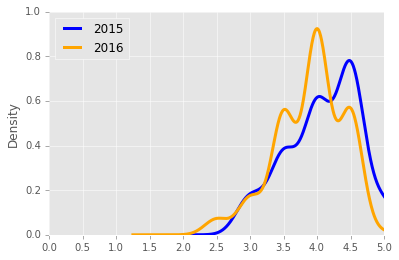

In [32]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.style.use('ggplot')
ax = plt.subplot(111)
Hick_data_2015['Fandango_Stars'].plot.kde(label='2015',legend=True,color='blue',linewidth=3.0)
us_data_2016['fandango'].plot.kde(label='2016',legend=True,color='orange',linewidth=3.0)
ax.set_xlim(0,5.0)
ax.set_xticks(np.arange(0,5.5,0.5))
# ax.grid('on')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.show()

- both distributions are left skewed
- 2016 rating distribution peak is more on left side
- the Fandango obviously changed its rating system from 2015

# Examine the frequency distribution tables

In [17]:
Hick_data_2015.describe()

,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
count,129.000000,129.000000,129.000000,129.000000
mean,4.085271,3.846512,3761.891473,0.238760
std,0.538096,0.505446,6543.601748,0.152741
min,3.000000,2.700000,35.000000,0.000000
25%,3.500000,3.500000,210.000000,0.100000
50%,4.000000,3.900000,1415.000000,0.200000
75%,4.500000,4.200000,4045.000000,0.400000
max,5.000000,4.800000,34846.000000,0.500000


In [18]:
us_data_2016.describe()

,year,fandango
count,191.0,191.000000
mean,2016.0,3.887435
std,0.0,0.509540
min,2016.0,2.500000
25%,2016.0,3.500000
50%,2016.0,4.000000
75%,2016.0,4.250000
max,2016.0,5.000000


In [19]:
abs_freq_15=Hick_data_2015['Fandango_Stars'].value_counts().sort_index()
rel_freq_15=abs_freq_15 / len(Hick_data_2015)
print('2015' + '\n' + '-' * 16)
print(rel_freq_15*100)

2015
----------------
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64


In [20]:
# percentage_3=rel_freq_15[3.0]*100
# percentage_3
percentage_under3_15=rel_freq_15[:3].sum()*100
percentage_under3_15

8.527131782945736

In [21]:
percentage_over4_15=rel_freq_15[4:].sum()*100
percentage_over4_15

73.64341085271319

In [22]:
abs_freq_16=us_data_2016['fandango'].value_counts().sort_index()
rel_freq_16=abs_freq_16 / len(us_data_2016)
print('2016' + '\n' + '-' * 16)
print(rel_freq_16*100)

2016
----------------
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


In [23]:
percentage_under3_16=rel_freq_16[:3].sum()*100
percentage_under3_16

10.471204188481675

In [24]:
percentage_over4_16=rel_freq_16[4:].sum()*100
percentage_over4_16

65.44502617801047

In deta before 2015,we have 8.5% of films rated 3 or less but in 2016,we have a 10.5% of films rated 3 or less.
In deta before 2015,we have 77% of films rated 4 or over but in 2016,we have a 65% of films rated 4 or over.

So here we can confirm again that in 2016 the movies have a lower rated trend. 

In [25]:
mean_2015=Hick_data_2015['Fandango_Stars'].mean()
print(mean_2015)
median_2015=Hick_data_2015['Fandango_Stars'].median()
print(median_2015)
mode_2015=Hick_data_2015['Fandango_Stars'].mode()[0]
print(mode_2015)

4.0852713178294575
4.0
4.5


In [26]:
mean_2016=us_data_2016['fandango'].mean()
print(mean_2016)
median_2016=us_data_2016['fandango'].median()
print(median_2016)
mode_2016=us_data_2016['fandango'].mode()[0]
print(mode_2016)

3.887434554973822
4.0
4.0


In [27]:
summary = pd.DataFrame()
summary[2015]=[mean_2015,median_2015,mode_2015]
summary[2016]=[mean_2016,median_2016,mode_2016]
summary.index=['mean','median','mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


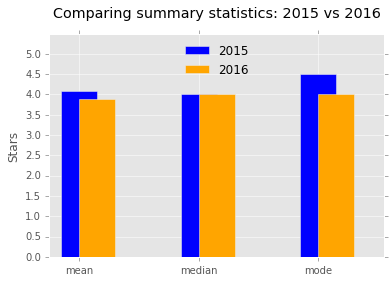

In [35]:
plt.style.use('ggplot')
summary[2015].plot.bar(color='blue',align='center',label=2015,
                       rot=0,width=0.3)
summary[2016].plot.bar(color='orange',align='edge',label=2016,
                       rot=0,width=0.3)
plt.title('Comparing summary statistics: 2015 vs 2016',y=1.05)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,0.5))
plt.ylabel('Stars')
plt.legend(framealpha=0, loc='upper center')

In [29]:
(mean_2015 - mean_2016)/ mean_2016

0.05089134236421066

the median is the same for both distributions, the mode is lower in 2016 by 0.5. 


# Conclusion

we showed that Fandango rating system is actually different from what they had on 2015.
we still don't know what is the cause of this change.